In [1]:
import os
import pandas as pd

In [2]:
weather_data = pd.read_csv('clean_weather_data.csv')
covid_data = pd.read_csv('clean_covid_data.csv')

In [7]:
weather_data = weather_data.drop(weather_data.columns[0],axis=1)
covid_data = covid_data.drop(covid_data.columns[0],axis=1)

In [8]:
covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,4592,2020-03-10,Washington,US,2020-03-10T22:13:11,267.0,23.0,1.0
1,4611,2020-03-10,Massachusetts,US,2020-03-10T22:13:11,92.0,0.0,1.0
2,4652,2020-03-10,Georgia,US,2020-03-10T03:53:03,17.0,0.0,0.0
3,4657,2020-03-10,Florida,US,2020-03-10T13:13:14,15.0,2.0,0.0
4,4658,2020-03-10,New Jersey,US,2020-03-10T18:13:16,15.0,1.0,0.0
...,...,...,...,...,...,...,...,...
3833,54265,2020-06-30,Vermont,US,2021-04-02 15:13:53,1208.0,56.0,0.0
3834,54270,2020-06-30,Virginia,US,2021-04-02 15:13:53,62787.0,1763.0,0.0
3835,54278,2020-06-30,Washington,US,2021-04-02 15:13:53,33439.0,1303.0,0.0
3836,54280,2020-06-30,West Virginia,US,2021-04-02 15:13:53,2905.0,93.0,0.0


In [9]:
weather_data

,date,Average Temperature (deg F),location,fids
0,2020-03-24,33.750000,Washington,FIPS:53
1,2020-03-26,34.111111,Washington,FIPS:53
2,2020-03-27,38.266667,Washington,FIPS:53
3,2020-03-28,41.111111,Washington,FIPS:53
4,2020-03-29,40.583333,Washington,FIPS:53
...,...,...,...,...
3326,2020-06-26,74.538462,Alabama,FIPS:01
3327,2020-06-27,77.384615,Alabama,FIPS:01
3328,2020-06-28,81.153846,Alabama,FIPS:01
3329,2020-06-29,80.230769,Alabama,FIPS:01


In [13]:
#We can compare average temperature to confirmed cases, deaths, and recoveries
merged_df = covid_data.merge(weather_data,how='inner',left_on=['ObservationDate','Province/State'],right_on=['date','location'])
merged_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Average Temperature (deg F),location,fids
0,4611,2020-03-10,Massachusetts,US,2020-03-10T22:13:11,92.0,0.0,1.0,2020-03-10,54.500000,Massachusetts,FIPS:25
1,4652,2020-03-10,Georgia,US,2020-03-10T03:53:03,17.0,0.0,0.0,2020-03-10,58.000000,Georgia,FIPS:GG
2,4658,2020-03-10,New Jersey,US,2020-03-10T18:13:16,15.0,1.0,0.0,2020-03-10,57.333333,New Jersey,FIPS:34
3,4676,2020-03-10,Maryland,US,2020-03-10T18:13:16,8.0,0.0,0.0,2020-03-10,61.000000,Maryland,FIPS:24
4,4686,2020-03-10,Virginia,US,2020-03-10T03:53:03,7.0,0.0,0.0,2020-03-10,59.000000,Virginia,FIPS:51
...,...,...,...,...,...,...,...,...,...,...,...,...
3322,54251,2020-06-30,Utah,US,2021-04-02 15:13:53,22217.0,172.0,0.0,2020-06-30,52.375000,Utah,FIPS:49
3323,54265,2020-06-30,Vermont,US,2021-04-02 15:13:53,1208.0,56.0,0.0,2020-06-30,67.500000,Vermont,FIPS:50
3324,54278,2020-06-30,Washington,US,2021-04-02 15:13:53,33439.0,1303.0,0.0,2020-06-30,61.000000,Washington,FIPS:53
3325,54280,2020-06-30,West Virginia,US,2021-04-02 15:13:53,2905.0,93.0,0.0,2020-06-30,73.000000,West Virginia,FIPS:54


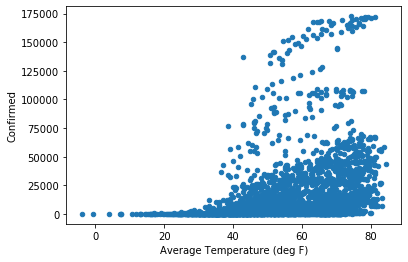

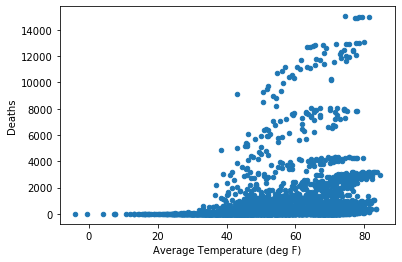

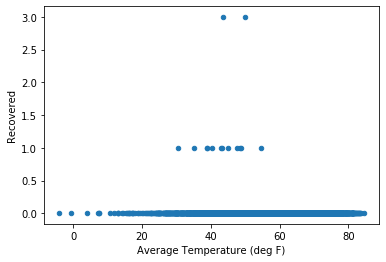

In [17]:
#First plot avg temp on confirmed, deaths, and recoveries

merged_df.plot(y='Confirmed',x='Average Temperature (deg F)',kind='scatter')
merged_df.plot(y='Deaths',x='Average Temperature (deg F)',kind='scatter')
merged_df.plot(y='Recovered',x='Average Temperature (deg F)',kind='scatter')

In [ ]:
#We can see a large cluster of data towards the lower end of the confirmed/deaths, 
#which tells us we may want to control for state population in a more advanced analysis

In [19]:
#Then quantify
#We drop consideration of the "recovered" stat since it seems to be inaccurate given the low level of its values 
#compared to confirmed/deaths and the understood recovery rate in other studies

confirmed_df = merged_df[['Confirmed','Average Temperature (deg F)']]
death_df = merged_df[['Deaths','Average Temperature (deg F)']]

#we then calculate corr coeff

print(confirmed_df.corr())
print(death_df.corr())

                             Confirmed  Average Temperature (deg F)
Confirmed                     1.000000                     0.309284
Average Temperature (deg F)   0.309284                     1.000000
                               Deaths  Average Temperature (deg F)
Deaths                       1.000000                     0.263005
Average Temperature (deg F)  0.263005                     1.000000


In [ ]:
#We definitely do have a moderate correlation of between .26-.31 for these covid figures
#We may also want to split this by state or bootstrap (per SIADS 524) to get a better estimate - 
#but the latter is beyond the scope of this course